### Importing Libraries
---

In [1]:
!pip install pandas-profiling

In [2]:

from __future__ import print_function
%matplotlib inline
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import pandas_profiling
plt.style.use("ggplot")
warnings.simplefilter("ignore")

C:\Users\dell\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
plt.rcParams['figure.figsize'] = (12,8) #will set graph figure with 1200px in width and 800px in height.

### Exploratory Data Analysis


In [4]:
dataset = pd.read_csv('employee_data.csv')
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
dataset.profile_report(title="Data Report")#pandas profiling dataframe

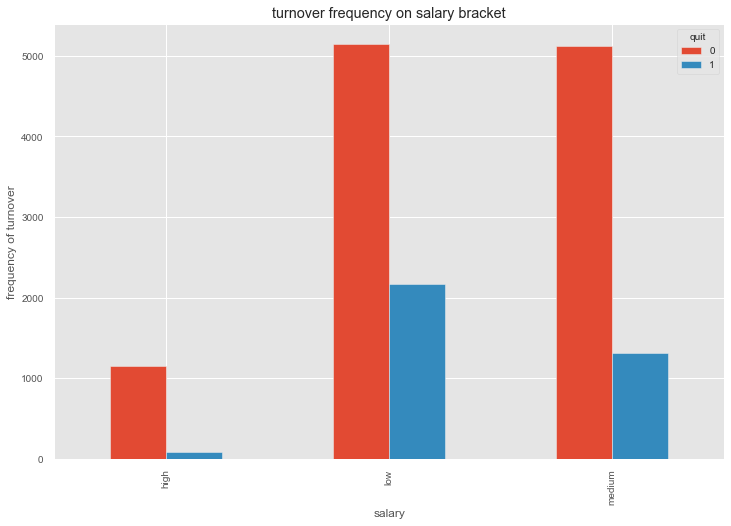

In [6]:
pd.crosstab(dataset.salary, dataset.quit).plot(kind='bar')
plt.title('turnover frequency on salary bracket')
plt.xlabel('salary')
plt.ylabel('frequency of turnover')
plt.show()

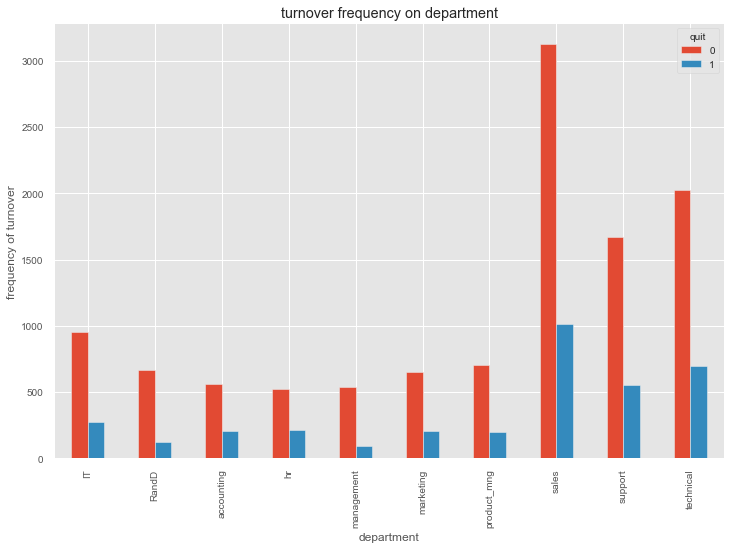

In [7]:
pd.crosstab(dataset.department, dataset.quit).plot(kind='bar')
plt.title('turnover frequency on department')
plt.xlabel('department')
plt.ylabel('frequency of turnover')
plt.show()

### Encoding Categorical Features
---

In [8]:
cat_vars=['department','salary']
for var in cat_vars:
    cat_list=pd.get_dummies(dataset[var],prefix=var)#to create one hot encoded representation of the variables
    dataset=dataset.join(cat_list)

In [9]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [10]:
dataset.drop(columns=['department','salary'],axis=1,inplace=True)

In [11]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


###  Visualize Class Imbalance
---

In [12]:
!pip install yellowbrick

In [13]:
from yellowbrick.target import ClassBalance
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12,8)

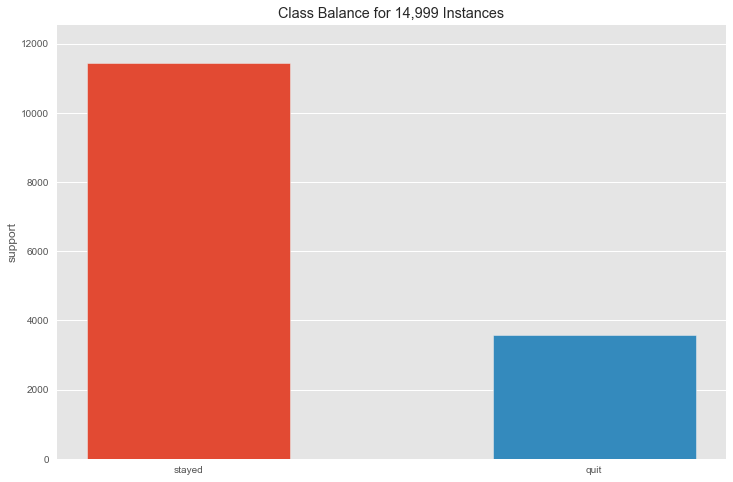

<AxesSubplot:title={'center':'Class Balance for 14,999 Instances'}, ylabel='support'>

In [14]:
visualizer=ClassBalance(labels=['stayed','quit']).fit(dataset.quit)
visualizer.show()

In [15]:
#you can see that we have a class imbalance problem here(no. of stayed >> no. of quit) so when we train our model , we need to make sure that the training set and the test set reflect the same thing

### Splitting the dataset into Training and Test Sets
---

In [16]:
X=dataset.loc[:,dataset.columns!='quit']
y=dataset.quit

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2,stratify=y)#using stratify coz of class imbalance

### Building an Interactive Decision Tree Classifier
---

- Data is a finite set $$\mathbb{L}=\{(x_i,y_i)|i=0, ..., N-1\}$$
where $x_i \in X = X_1 \times ... \times X_p$ and $y_i \in y$ are randomly drawn from $P_{X,Y}.$

E.g., $(x_i,y_i)=((\text{salary = low, department = sales, ...}),\text{quit = 1})$

- The goal is to find a model $\varphi_\mathbb{L}: X \mapsto y$ minimizing $$\text{Err}(\varphi_\mathbb{L}) = \mathbb{E}_{X,Y}\{L(Y, \varphi_\mathbb{L}(X))\}.$$

About:
 
 - Decision trees are non-parametric models which can model arbitrarily complex relations between inputs and outputs, without any prior assumption
 
- Decision trees handle numeric and categorical variables

- They implement feature selection, making them robust to noisy features (to an extent)

- Robust to outliers or errors in labels

- Easily interpretable by even non-ML practioners.

#### Decision trees: partitioning the feature space:

![partition](assets/images/partition-feature-space.png)

- Decision trees generally have low bias but have high variance.
- We will solve the high variance problem in Task 8.

In [18]:
!pip install graphviz

In [19]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

In [20]:
@interact
def plot_tree(crit=['gini','entropy'],
              split=['best','random'],
              depth=IntSlider(min=1,max=30,value=2, continuous_update=False),
              min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
              min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    estimator=DecisionTreeClassifier(random_state=0,
                                    criterion=crit,
                                    splitter=split,
                                    max_depth=depth,
                                    min_samples_split=min_split,
                                    min_samples_leaf=min_leaf)
    estimator.fit(X_train,y_train)
    print('Decsion tree training accuracy : {:.3f}'.format(accuracy_score(y_train,estimator.predict(X_train))))
    print('Decsion tree test accuracy : {:.3f}'.format(accuracy_score(y_test,estimator.predict(X_test))))
    graph=Source(tree.export_graphviz(estimator,out_file=None,
                                     feature_names=X_train.columns,
                                     class_names=['stayed','quit'],
                                     filled=True))
    display(Image(data=graph.pipe(format='jpg')))
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

In [21]:
#decision trees are susceptible to overfitting, we will solve this problem using random forest

### Task 8: Build an Interactive Random Forest Classifier
---

Although randomization increases bias, it is possible to get a reduction in variance of the ensemble. Random forests are one of the most robust machine learning algorithms for a variety of problems.

- Randomization and averaging lead to a reduction in variance and improve accuracy
- The implementations are parallelizable
- Memory consumption and training time can be reduced by bootstrapping
- Sampling features and not solely sampling examples is crucial to improving accuracy

In [22]:
@interact
def plot_tree_rf(crit=['gini','entropy'],
                 bootstrap=['True','False'],
                 depth=IntSlider(min=1,max=30,value=3, continuous_update=False),
                 forests=IntSlider(min=1,max=200,value=100,continuous_update=False),
                 min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    estimator=RandomForestClassifier(random_state=1,
                                    criterion=crit,
                                    bootstrap=bootstrap,
                                    n_estimators=forests,
                                    max_depth=depth,
                                    min_samples_split=min_split,
                                    min_samples_leaf=min_leaf,
                                    n_jobs=-1,
                                    verbose=False)
    estimator.fit(X_train,y_train)
    print('Random forests training accuracy : {:.3f}'.format(accuracy_score(y_train,estimator.predict(X_train))))
    print('Random forests test accuracy : {:.3f}'.format(accuracy_score(y_test,estimator.predict(X_test))))
    num_tree=estimator.estimators_[0]
    print('Visualising tree :',0)
    graph=Source(tree.export_graphviz(num_tree,#we don't need estimator as a para in random forest
                                     out_file=None,
                                     feature_names=X_train.columns,
                                     class_names=['stayed','quit'],
                                     filled=True))
    display(Image(data=graph.pipe(format='jpg')))
    return estimator#to find out which features are considered important by the model
    
    

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

### Task 9: Feature Importance and Evaluation Metrics
---

In [23]:
from yellowbrick.model_selection import FeatureImportances
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use("ggplot")

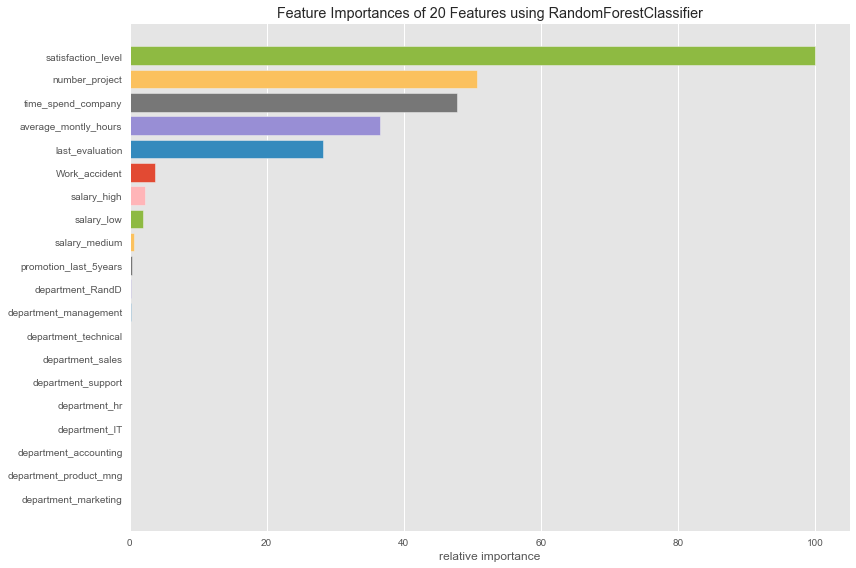

<AxesSubplot:title={'center':'Feature Importances of 20 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [24]:
rf=RandomForestClassifier(bootstrap='True', class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1,
                       verbose=False, warm_start=False)
viz=FeatureImportances(rf)
viz.fit(X_train,y_train)
viz.show()
#X axis shows the importance level and y axis shows the features acc. to theire relative importance

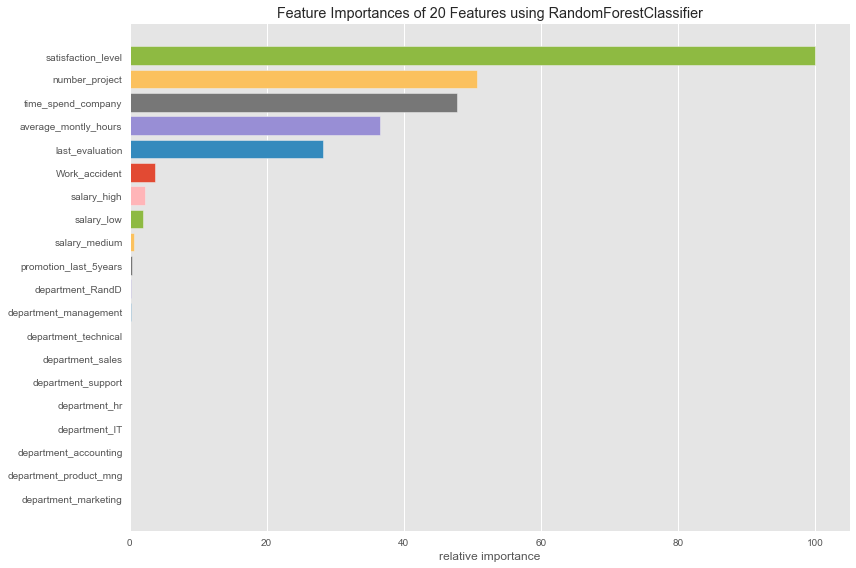

<AxesSubplot:title={'center':'Feature Importances of 20 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [25]:
dt=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')
viz=FeatureImportances(rf)
viz.fit(X_train,y_train)
viz.show()

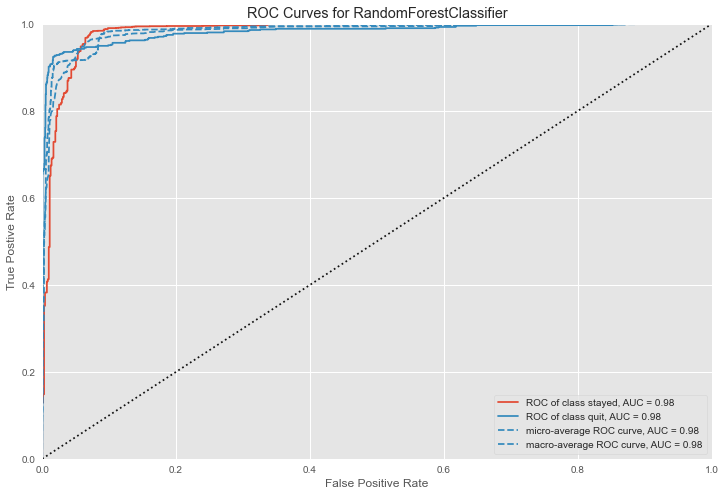

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [26]:
from yellowbrick.classifier import ROCAUC
visualizer=ROCAUC(rf,classes=['stayed','quit'])
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()#similar to show method

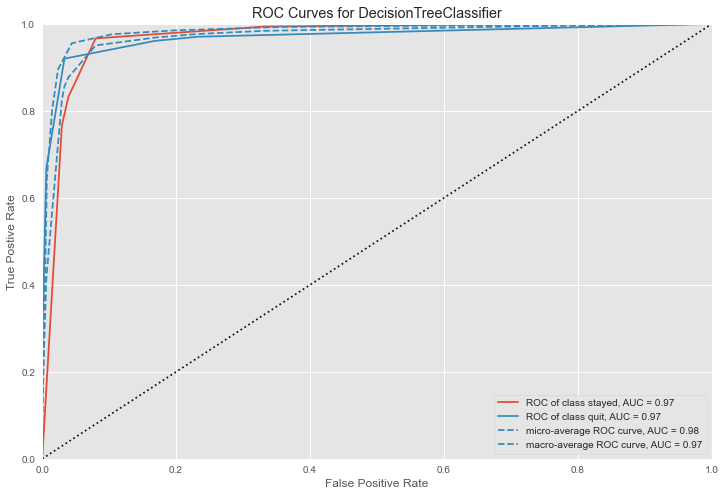

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [27]:
visualizer=ROCAUC(dt,classes=['stayed','quit'])
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()#similar to show method